In [328]:
# Importing required libraries
import pandas as pd
import numpy as np

#sklearn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_curve, auc, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Visualisation Libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [329]:
# Reading CSV file 
url = 'preprocessed_diabetes.csv'
df = pd.read_csv(url)

In [330]:
df.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0       0  80.0             0              1           Never  25.19   
1       0  54.0             0              0           Never  27.32   
2       1  28.0             0              0           Never  27.32   
3       0  36.0             0              0         Current  23.45   
4       1  76.0             1              1         Current  20.14   

   HbA1c_level  blood_glucose_level  diabetes bmi_category  
0     0.989693             0.040538         0   Overweight  
1     0.989693            -1.421307         0   Overweight  
2     0.152614             0.479091         0   Overweight  
3    -0.498447             0.405999         0       Normal  
4    -0.684464             0.405999         0       Normal

In [331]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes',
       'bmi_category'],
      dtype='object')

In [332]:
#### Encoding smoking history column
encoder = OrdinalEncoder(categories=[['Never', 'Current', 'Former', 'Ever', 'Not current']])
df['smoking_encoded'] = encoder.fit_transform(df[['smoking_history']])

## 1. LOGISTIC REGRESSION

#### Split the Data into training and test dataset

In [333]:
# Seperating target and features
X = df[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_encoded', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = df[['diabetes']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Fitting the Logistic Regression Model

In [334]:
# Creating a logistic regression model
model = LogisticRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Making Predictions

In [335]:
y_pred = model.predict(X_test)

In [336]:
# Probability for class 1
y_prob = model.predict_proba(X_test)[:, 1]  

#### Model Evaluation

In [337]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 95.68


#### Confusion Matrix

In [338]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[16942   163]
 [  649  1056]]


#### Precision and Recall Matrix

In [339]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17105
           1       0.87      0.62      0.72      1705

    accuracy                           0.96     18810
   macro avg       0.91      0.80      0.85     18810
weighted avg       0.95      0.96      0.95     18810



#### Interpretation of Model Coefficients

In [340]:
# Model coefficients (weights)
coefficients = model.coef_
print(f"Model Coefficients: {coefficients}")

Model Coefficients: [[0.0938128  0.04412538 0.59720997 0.97776234 0.04920522 0.11610033
  2.58199736 1.38995489]]


#### Tuning and Cross-Validation

In [341]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Using GridSearchCV to search for the best parameters
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(grid_search.best_params_)


/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for

{'C': 0.1}


/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Visaulization

#### Confusion matrix

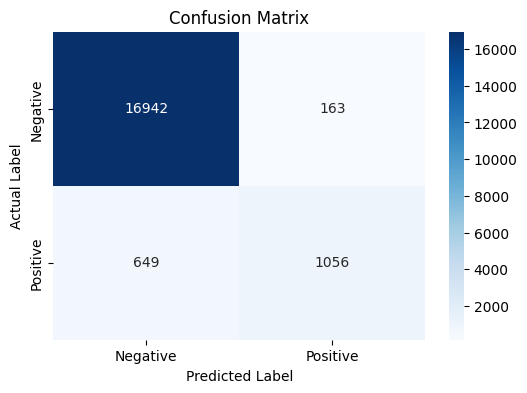

In [342]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

#### Actual vs Predicted Values

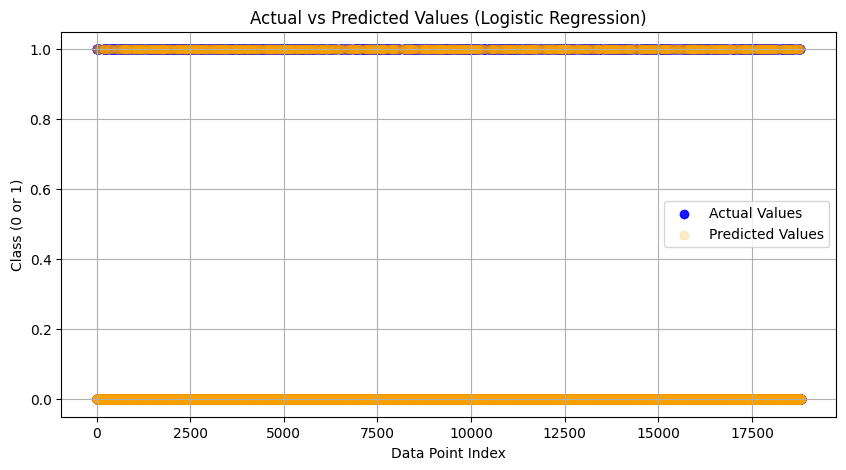

In [343]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', alpha=0.9, label='Actual Values')
plt.scatter(range(len(y_test)), y_pred, color='orange', alpha=0.2, label='Predicted Values')
plt.title('Actual vs Predicted Values (Logistic Regression)')
plt.xlabel('Data Point Index')
plt.ylabel('Class (0 or 1)')
plt.legend()
plt.grid(True)
plt.show()


#### Precision Recall vs Threshold

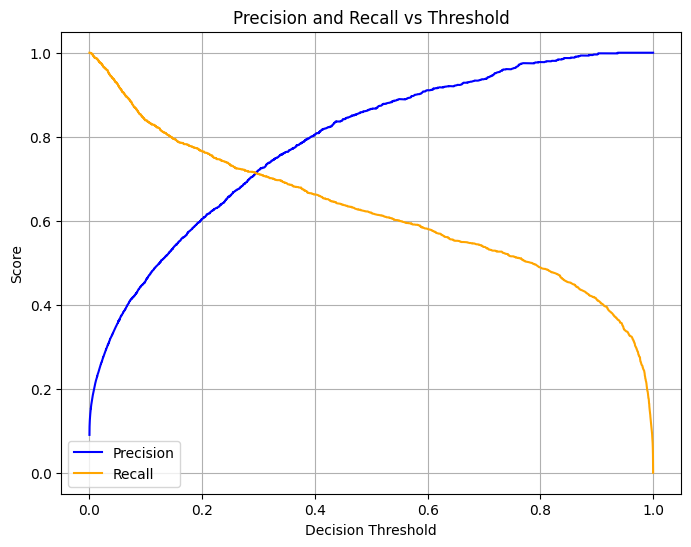

In [344]:
# Computing precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plotting Precision-Recall vs Threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label="Precision", color="blue")
plt.plot(thresholds, recall[:-1], label="Recall", color="orange")
plt.title('Precision and Recall vs Threshold')
plt.xlabel('Decision Threshold')
plt.ylabel('Score')
plt.legend(loc="best")
plt.grid(True)
plt.show()


## 2. Decision Tree

In [345]:
# Importing required libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree

#### Training the model

In [346]:
# Creating a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fitting the model on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### Predictions

In [347]:
# Making predictions on the test set
y_pred = dt_classifier.predict(X_test)

#### Model Evaluation

In [348]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ",conf_matrix)

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17105
           1       0.72      0.74      0.73      1705

    accuracy                           0.95     18810
   macro avg       0.85      0.85      0.85     18810
weighted avg       0.95      0.95      0.95     18810

Confusion Matrix:  [[16612   493]
 [  449  1256]]


## Visualization

#### Confusion Matrix

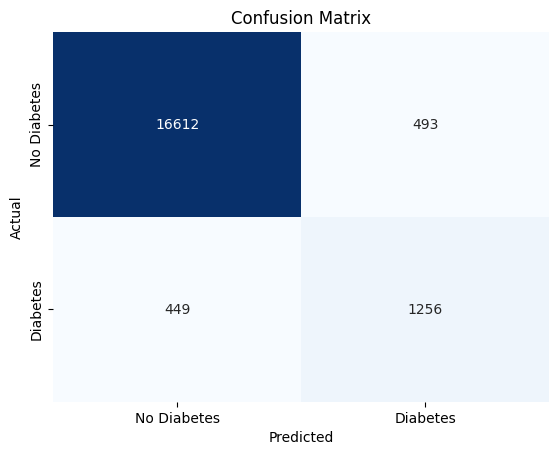

In [349]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Trained Decision tree

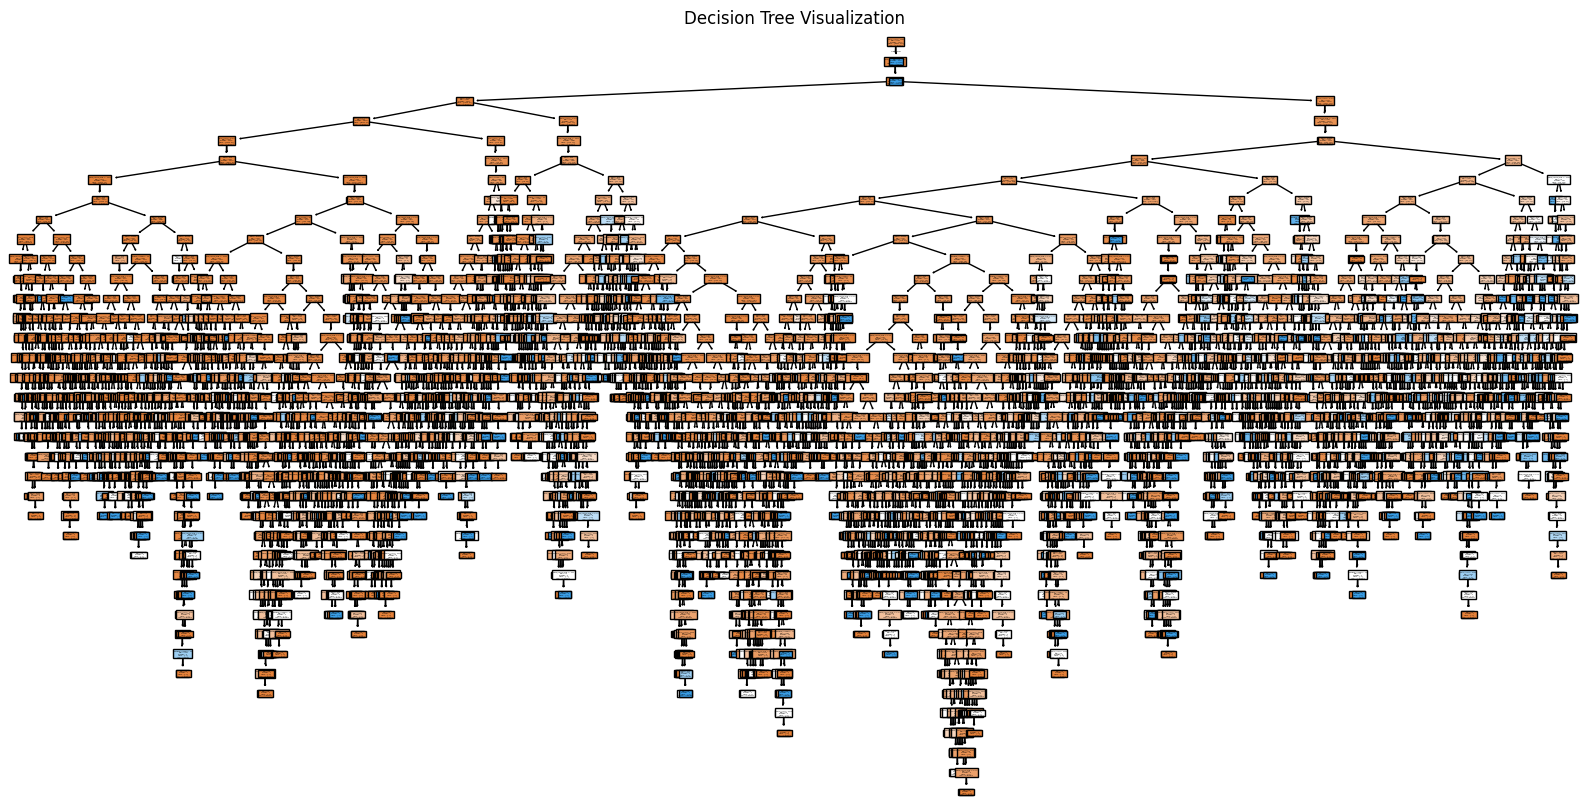

In [350]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

**3)SVM**

In [351]:
X = df[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_encoded', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = df[['diabetes']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [352]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [353]:
print(X_train.shape)  
print(y_test.shape)  
print(X_test.shape)  
print(y_train.shape)  

(75240, 8)
(18810, 1)
(18810, 8)
(75240, 1)


In [354]:
#Train the model
svm_model = SVC(kernel='linear')  
svm_model.fit(X_train, y_train.values.ravel())  

SVC(kernel='linear')

In [355]:
#test the moodel
y_pred = svm_model.predict(X_test)

In [356]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9567251461988304
Confusion Matrix:
 [[17006    99]
 [  715   990]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     17105
           1       0.91      0.58      0.71      1705

    accuracy                           0.96     18810
   macro avg       0.93      0.79      0.84     18810
weighted avg       0.96      0.96      0.95     18810



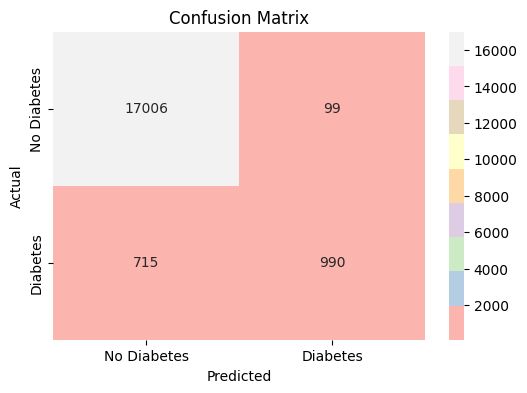

In [357]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Pastel1', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/metrics/_plot/roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


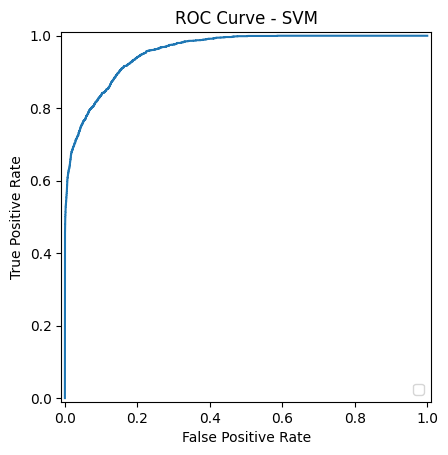

In [358]:
y_scores = svm_model.decision_function(X_test)
fp, tp, _ = roc_curve(y_test, y_scores)
roc_disp = RocCurveDisplay(fpr=fp, tpr=tp)
roc_disp.plot()
plt.title("ROC Curve - SVM")
plt.show()

**4)NAIVE BAYES**

In [359]:
X = df[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_encoded', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = df['diabetes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [360]:
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred = nb_model.predict(X_test_scaled)


In [361]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[15877  1228]
 [  588  1117]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     17105
           1       0.48      0.66      0.55      1705

    accuracy                           0.90     18810
   macro avg       0.72      0.79      0.75     18810
weighted avg       0.92      0.90      0.91     18810



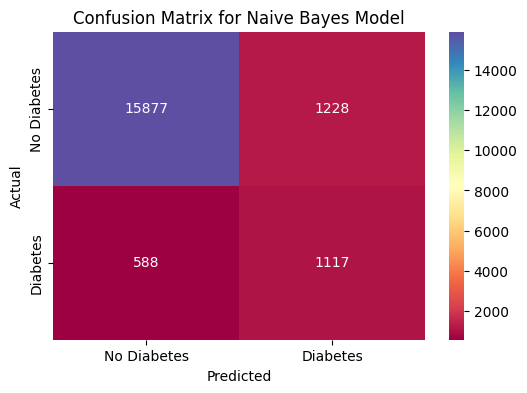

In [362]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Spectral', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes Model')
plt.show()

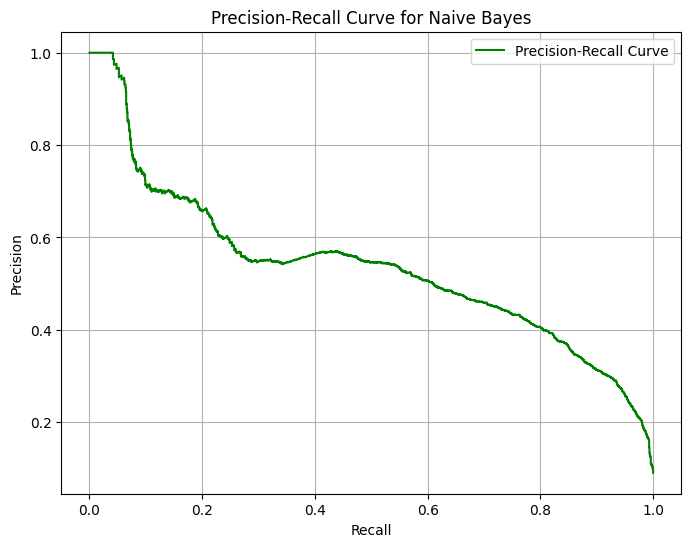

In [363]:
y_prediction = nb_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class (diabetes)
precision, recall, thresholds = precision_recall_curve(y_test, y_prediction)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='g', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Naive Bayes')
plt.legend(loc='best')
plt.grid(True)
plt.show()


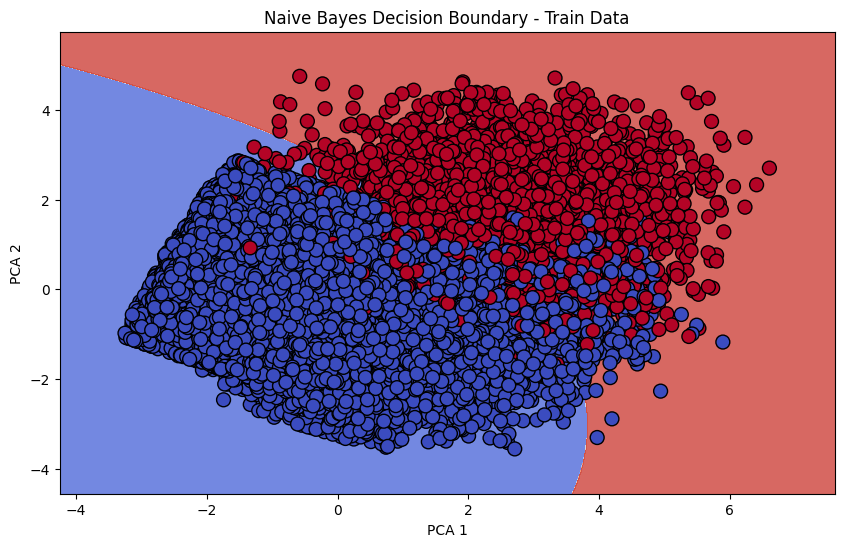

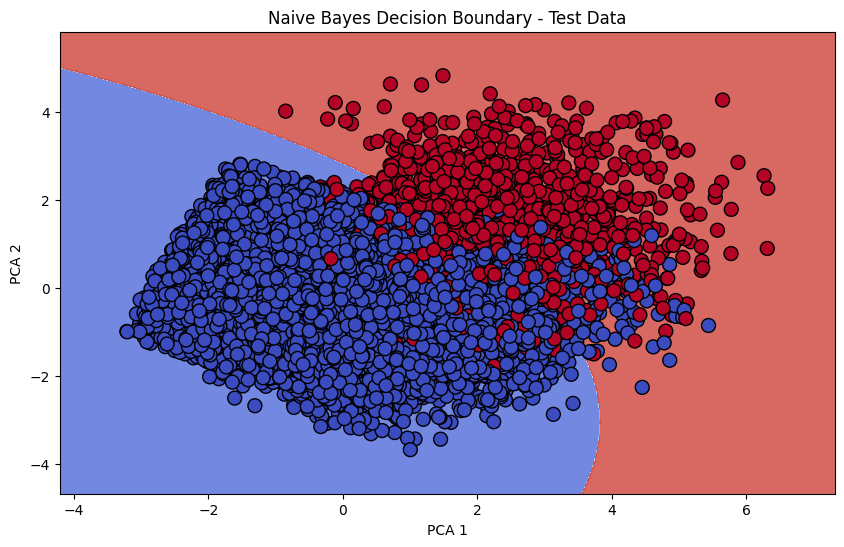

In [364]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train Naive Bayes on the reduced 2D data
nb_pca_model = GaussianNB()
nb_pca_model.fit(X_train_pca, y_train)

def plot_decision_boundary(model, X, y, title='Decision Boundary'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100, cmap='coolwarm')
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

plot_decision_boundary(nb_pca_model, X_train_pca, y_train, title='Naive Bayes Decision Boundary - Train Data')
plot_decision_boundary(nb_pca_model, X_test_pca, y_test, title='Naive Bayes Decision Boundary - Test Data')


## 5. KNN

Divide the dataset into training and testing

In [365]:
X = df[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_encoded', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = df[['diabetes']]
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y.values.ravel(), test_size=0.2, random_state=42)

In [366]:
#print shape of training and testing data
print(X_train.shape)  
print(y_test.shape)  
print(X_test.shape)  
print(y_train.shape) 

(75240, 8)
(18810,)
(18810, 8)
(75240,)


Train the model and make predictions

In [367]:
k_values = range(1, 26)
accuracies = []
best_k = None
best_accuracy = 0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the KNN model for each K
    knn.fit(X_train_knn, y_train_knn)
    y_pred_knn = knn.predict(X_test_knn)
    accuracy = accuracy_score(y_test_knn, y_pred_knn)
    accuracies.append(accuracy)

    # Check if current accuracy > best accuracy 
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k  # best k

# Fit the KNN model with the best k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_knn, y_train_knn)
y_pred_best_knn = best_knn.predict(X_test_knn)

Model Evaluation

Best value of K: 7
Best value of Accuracy: 95.09303561935141 %


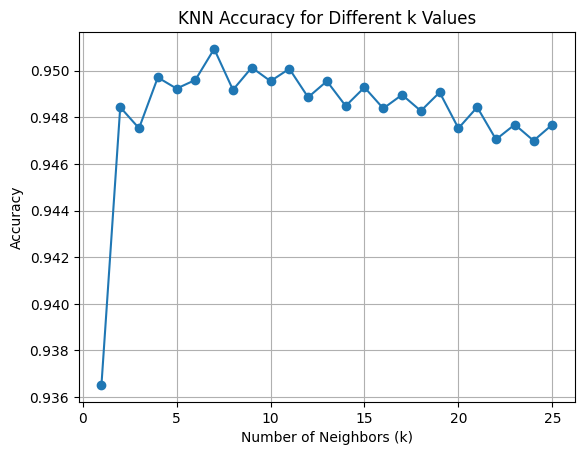

In [368]:
print(f'Best value of K: {best_k}')
print(f'Best value of Accuracy: {best_accuracy*100} %')

# Plot accuracy for each k value
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.grid(True)
plt.show()

In [369]:
# Evaluation Metrics
accuracy = accuracy_score(y_test_knn, y_pred_best_knn)
precision = precision_score(y_test_knn, y_pred_best_knn)
recall = recall_score(y_test_knn, y_pred_best_knn)
f1 = f1_score(y_test_knn, y_pred_best_knn)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test_knn, y_pred_best_knn))

Accuracy: 0.9509303561935141
Precision: 0.9107142857142857
Recall: 0.5085043988269795
F1 Score: 0.6526157320286037

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     17105
           1       0.91      0.51      0.65      1705

    accuracy                           0.95     18810
   macro avg       0.93      0.75      0.81     18810
weighted avg       0.95      0.95      0.94     18810



Visualisations

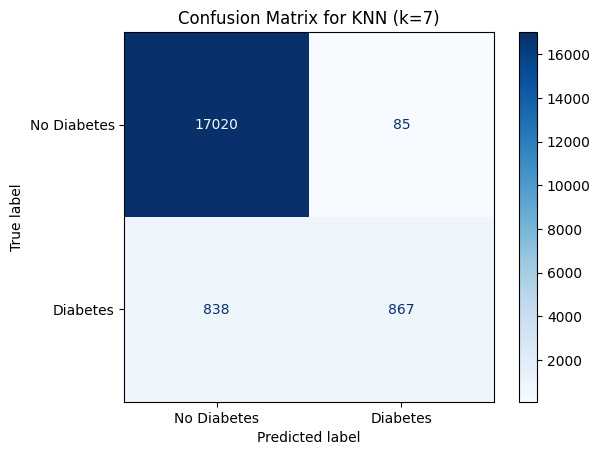

In [370]:
# Confusion matrix for best K
cm_knn = confusion_matrix(y_test_knn, y_pred_best_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['No Diabetes', 'Diabetes'])

disp_knn.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for KNN (k={best_k})')
plt.show()

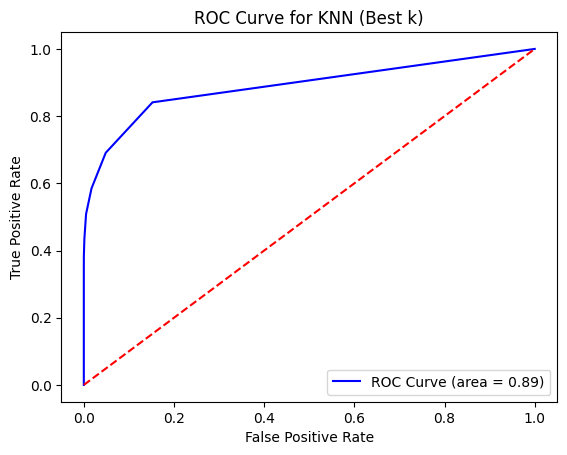

In [371]:
y_scores_knn = best_knn.predict_proba(X_test_knn)[:,1]

fpr, tpr, _ = roc_curve(y_test_knn, y_scores_knn)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN (Best k)')
plt.legend(loc="lower right")
plt.show()

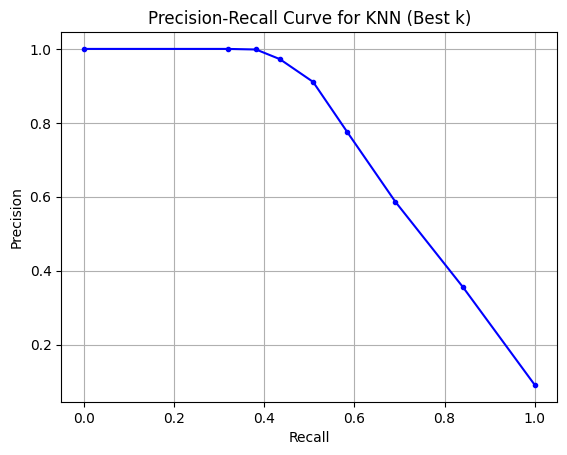

In [372]:
# Calculate precision and recall values for best K
precision, recall, _ = precision_recall_curve(y_test_knn, y_scores_knn)

plt.figure()
plt.plot(recall, precision, marker='.', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for KNN (Best k)')
plt.grid(True) 
plt.show()

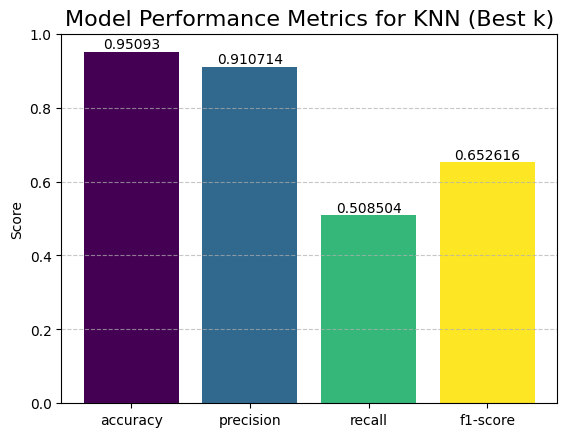

In [373]:
# Calculate metrics for best K
report = classification_report(y_test_knn, y_pred_best_knn, output_dict=True)
metrics = ['accuracy', 'precision', 'recall', 'f1-score']
values = [report['accuracy'], report['1']['precision'], report['1']['recall'], report['1']['f1-score']]
colors = plt.cm.viridis(np.linspace(0, 1, len(metrics)))  # Viridis palette

        
# Create the bar plot
plt.figure()
bars=plt.bar(metrics, values, color=colors)
plt.ylim(0, 1)  
plt.ylabel('Score')
plt.title('Model Performance Metrics for KNN (Best k)', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.bar_label(bars)

plt.show()

## 6. Random Forest

Divide the dataset into training and testing

In [374]:
X = df[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_encoded', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = df['diabetes'] 

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

In [375]:
#print shape of training and testing data
print(X_train.shape)  
print(y_test.shape)  
print(X_test.shape)  
print(y_train.shape) 

(75240, 8)
(18810,)
(18810, 8)
(75240,)


Train the model and make predictions

In [376]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train_rf, y_train_rf)

# Make predictions
y_pred_rf = rf.predict(X_test_rf)

Model Evaluation

In [377]:
# Evaluation Metrics
accuracy = accuracy_score(y_test_rf, y_pred_rf)
precision = precision_score(y_test_rf, y_pred_rf)
recall = recall_score(y_test_rf, y_pred_rf)
f1 = f1_score(y_test_rf, y_pred_rf)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test_rf, y_pred_rf))

Accuracy: 0.9659755449229134
Precision: 0.9283990345937249
Recall: 0.6768328445747801
F1 Score: 0.7829036635006784

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17105
           1       0.93      0.68      0.78      1705

    accuracy                           0.97     18810
   macro avg       0.95      0.84      0.88     18810
weighted avg       0.96      0.97      0.96     18810



Visualisations

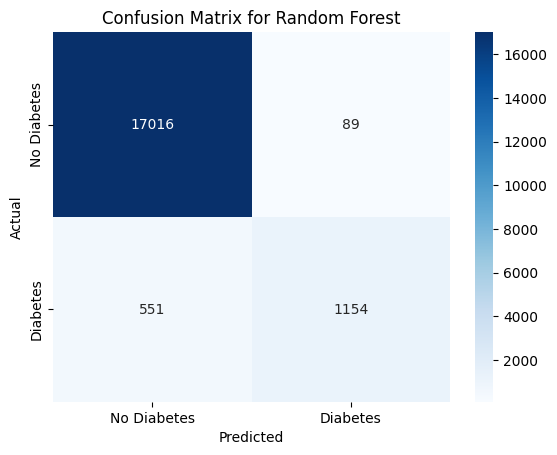

In [378]:
# Confusion Matrix
cm = confusion_matrix(y_test_rf, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

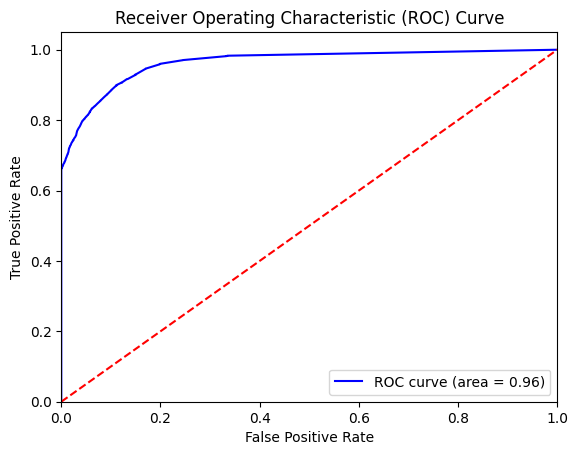

In [379]:
# Create ROC curve
y_pred_prob_rf = rf.predict_proba(X_test_rf)[:,1]

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_rf, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

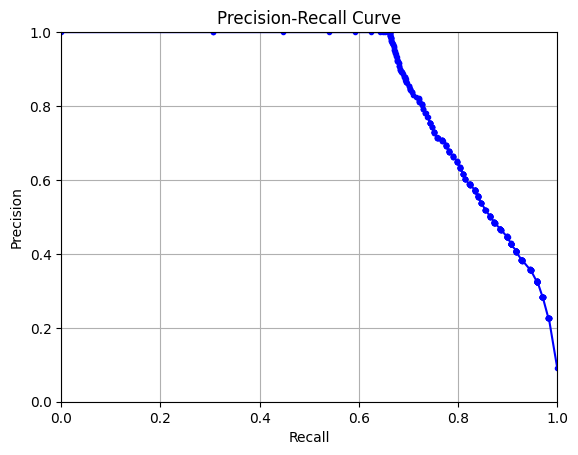

In [380]:
# precision and recall values 
precision_rf, recall_rf, _ = precision_recall_curve(y_test_rf, y_pred_prob_rf)

plt.figure()
plt.plot(recall_rf, precision_rf, color='blue', marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid()
plt.show()

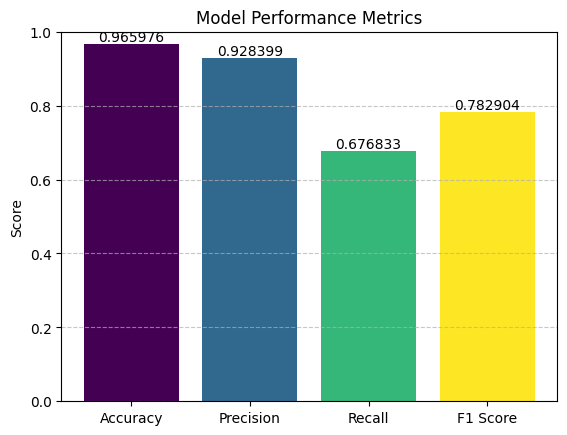

In [381]:
# calculate performance metrics
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
precision_rf = precision_score(y_test_rf, y_pred_rf)
recall_rf = recall_score(y_test_rf, y_pred_rf)
f1_rf = f1_score(y_test_rf, y_pred_rf)

# Creating a bar graph
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy_rf, precision_rf, recall_rf, f1_rf]

plt.figure()
colors = plt.cm.viridis(np.linspace(0, 1, len(metrics)))
bars = plt.bar(metrics, values, color=colors)
plt.title('Model Performance Metrics')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.bar_label(bars)
plt.show()

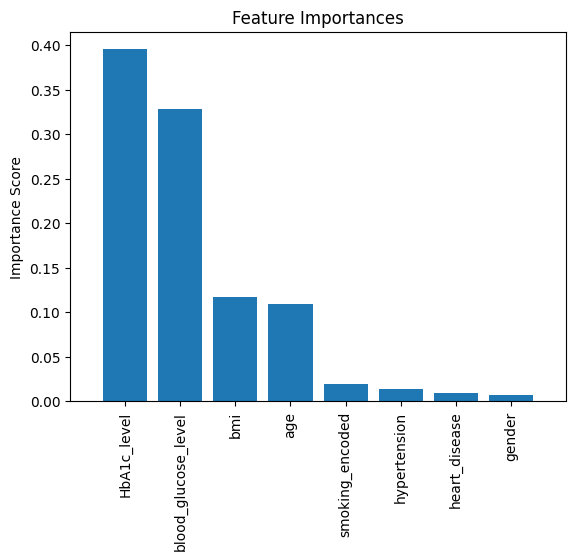

In [382]:
#calculate feature importance
importances = rf.feature_importances_
feature_names = X_train_rf.columns  
indices = np.argsort(importances)[::-1]

# Create a plot of feature importances
plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train_rf.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train_rf.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train_rf.shape[1]])
plt.ylabel('Importance Score')

plt.show()